In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#SCF values
modelSCF = np.arange(0, 1.001, 0.01)
obsSCF = np.arange(0, 1.001, 0.01)
deltaSWE = np.full((len(modelSCF), len(obsSCF)), np.nan)
deltaSCF = np.full((len(modelSCF), len(obsSCF)), np.nan)

In [3]:
#parameters
alpha = 0.4
beta = 0.4
maxsweincr = 5.0
minswe = 13.0

In [4]:
for ii in range(len(modelSCF)): #model
    for jj in range(len(obsSCF)): #obs
        if modelSCF[ii] < alpha * obsSCF[jj]:
            deltaSWE[jj, ii] = maxsweincr * (obsSCF[jj] - modelSCF[ii] / alpha)
        elif obsSCF[jj] < beta:
            deltaSWE[jj, ii] = - (maxsweincr) * modelSCF[ii] * (1 - obsSCF[jj] / beta)
        else:
            deltaSWE[jj, ii] = 0.0

In [5]:
modelSCF_2d, obsSCF_2d = np.meshgrid(modelSCF, obsSCF)

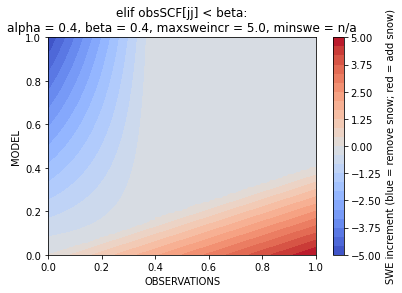

In [7]:
# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the contours of the surface using the "coolwarm" colormap
contours = ax.contourf(obsSCF_2d, modelSCF_2d, deltaSWE, cmap="coolwarm",
levels=np.linspace(-5, 5, 25))

# Add a colorbar to show the mapping from z-values to colors
colorbar = fig.colorbar(contours)

# Add a label to the colorbar
colorbar.set_label("SWE increment (blue = remove snow; red = add snow)")

# Add labels to the x- and y-axes
ax.set_xlabel("OBSERVATIONS")
ax.set_ylabel("MODEL")
ax.set_title("elif obsSCF[jj] < beta:\nalpha = 0.4, beta = 0.4, maxsweincr = 5.0, minswe = n/a")



#    show plot
plt.savefig('without_minswe_with_m_o_comp.pdf', facecolor='w', dpi = 400)
# Show the plot
plt.show()

In [8]:
import xarray as xr  # "canonical" namespace short-hand
import pathlib
import datetime
import math

In [9]:
import cartopy